# Lorenz System Simulation 


> "Simulate the Lorenz system  with Python"

- toc:false
- branch: master
- badges: false
- comments: false
- author: Alexandros Giavaras
- categories: [lorenz-system, Python, simulation, numerics]

The <a href="https://en.wikipedia.org/wiki/Lorenz_system">Lorenz system</a> is a system of ordinary differential equations first studied by Edward Lorenz. The system of ODEs is given below

$$\dot{x} = \sigma(y -x), ~~ \dot{y} = x (\rho - z) -y, ~~ \dot{z} = xy - \beta z$$

The model has three parameters i.e. $\sigma, \rho$ and $\beta$.

It is notable for having chaotic solutions for certain parameter values and initial conditions. In particular, the Lorenz attractor is a set of chaotic solutions of the Lorenz system. In popular media the 'butterfly effect' stems from the real-world implications of the Lorenz attractor, i.e. that in any physical system, in the absence of perfect knowledge of the initial conditions (even the minuscule disturbance of the air due to a butterfly flapping its wings), our ability to predict its future course will always fail. This underscores that physical systems can be completely deterministic and yet still be inherently unpredictable even in the absence of quantum effects. The shape of the Lorenz attractor itself, when plotted graphically, may also be seen to resemble a butterfly. 

In [23]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [18]:
class ODE45(object):
    
    def __init__(self, dt, n_steps, rhs, y0) -> None:
        self._dt = dt
        self._n_steps = n_steps
        self._rhs = rhs
        self._time = 0.0
        self._yold = y0
        
    def step(self):
        
        k1 = self._k1(t=self._time)
        k2 = self._k2(t=self._time, k1=k1)
        k3 = self._k3(t=self._time, k2=k2)
        k4 = self._k4(t=self._time, k3=k3)

        self._yold += k1/6. + k2/3. + k3/3. + k4/6.
        
    def integrate(self) -> None:
        self._time = 0.0
        solutions = [[self._yold[0]], 
                     [self._yold[1]], 
                     [self._yold[2]]]
        times = [self._time]
        for itr in range(self._n_steps):
            self.step()
            self._time += self._dt
            times.append(self._time)
            solutions[0].append(self._yold[0])
            solutions[1].append(self._yold[1])
            solutions[2].append(self._yold[2])
        return times, solutions
        
    def _k1(self, t: float) -> np.array:
        return self._dt * self._rhs(t, self._yold)

    def _k2(self, t: float, k1: np.array) -> np.array:
        return self._dt * self._rhs(t + 0.5 * self._dt, self._yold + 0.5 * k1)

    def _k3(self, t: float, k2: np.array) -> np.array:
        return self._dt * self._rhs(t + 0.5 * self._dt, self._yold + 0.5 * k2)

    def _k4(self, t: float, k3: np.array) -> np.array:
        return self._dt * self._rhs(t +  self._dt, self._yold +  k3)
        
    

In [19]:
class LorenzRhs(object):
    
    def __init__(self, beta: np.array):
        self._beta = beta
        
    def __call__(self, t: float, x:np.array) -> np.array:
        result = np.array([beta[0]*(x[1] - x[0]),
                      x[0]*(beta[1] - x[2]) - x[1],
                      x[0]*x[1] - beta[2]*x[2]])
        return result

In [20]:
beta = np.array([10., 28., 8./3.])
x0 = np.array([0., 1.0, 20.])
dt = 0.001
n_steps = 50000

In [21]:
rhs = LorenzRhs(beta=beta)
rk45 = ODE45(dt=dt, n_steps=n_steps, rhs=rhs, y0=x0)

In [22]:
times, solutions = rk45.integrate()

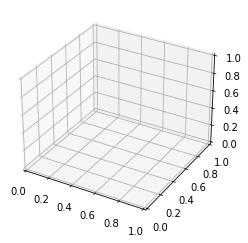

In [24]:
fig = plt.figure()
ax = plt.axes(projection='3d')

The following video discusses how to simulate the Lorenz system with Matlab.

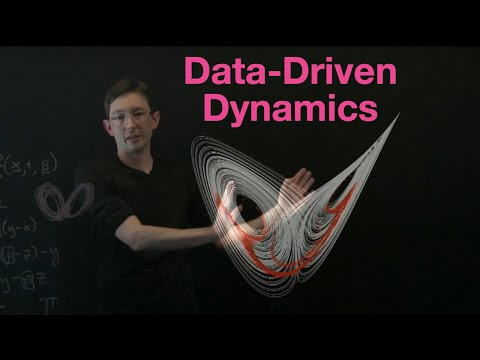

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('EnsB1wP3LFM', width=800, height=300)